In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate Data

In [2]:
def generate_data():
    x = np.arange(-10, 10, .01)
    y = (2 * x**4 + 13 * x**3 + 7 * x**2 - 30) / 1000
    y += np.random.rand(x.shape[0])
    return x.reshape(-1, 1), y

In [3]:
X, y = generate_data()

In [4]:
X

array([[-10.  ],
       [ -9.99],
       [ -9.98],
       ...,
       [  9.97],
       [  9.98],
       [  9.99]])

In [5]:
y

array([ 7.73585044,  7.6823609 ,  7.97195279, ..., 34.0062937 ,
       33.79035449, 34.46478271])

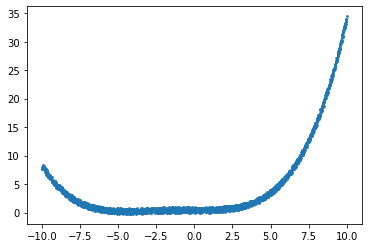

In [6]:
plt.scatter(X, y, s=3)

# Linear Regression

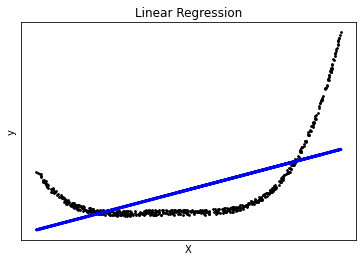

In [7]:
# Split the data into training/testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create linear regression object
# Train the model using the training sets
reg = LinearRegression().fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test,  color='black', s=3)
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.xticks(())
plt.yticks(())
plt.show()

# Polynomial Regression

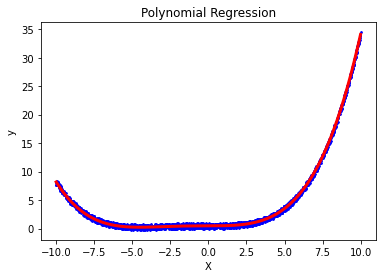

In [17]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='blue', s=3)
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='red', linewidth=3)
    plt.title('Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
    return
viz_polymonial()

# Local Linear Regression (Using kernel smoothing)

### Why?
Linear Regression works accurately only on data has a linear relationship between them. In cases where the independent variable is not linearly related to the dependent variable we cannot use simple Linear Regression, hence we resort to Locally Weighted Linear Regression (LWLR).

### Principle:
* assign different weights to the training data
* assign bigger weights to the data points that are closer to the data we are trying to predict

In LWLR, we do not split the dataset into training and test data. We use the entire dataset at once and hence this takes a lot of time, space and computational exercise.

### Kernel Smoothing:
We use Kernel Smoothing to find out the weights to be assigned to the training data. This is much like the Gaussian Kernel but offers a “bell-shaped kernel”. It uses the following formula :

D = e ^ ((X - X0)^2 / ((-2) * width^2))

* We find a weight matrix for each training input X. The weight matrix is always a diagonal matrix.
* The weight decreases as the distance between the predicting data and the training data.

### Predicting:

β = ((x’*w*x)^-1 ) * x’ * w * y

y =  β * x0 

In [9]:
# kernel smoothing function
def kernel(point, xmat, width):
    rows,columns = np.shape(xmat) # get number of rows and columns
    weights = np.mat(np.eye(rows)) # Produce a diagonal matrix, with ones on the diagonal
    
    for j in range(rows):
        diff = point - xmat[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * width**2))
        
    return weights

In [10]:
# function to return local weight of eah traiining example
def localWeight(point, xmat, ymat, width):
    wt = kernel(point, xmat, width)
    beta = (xmat.T * wt * xmat).I * (xmat.T * wt * ymat.T)
    return beta

In [11]:
# root function that drives the algorithm
def localWeightRegression(xmat, ymat, width):
    rows = np.shape(xmat)[0]
    ypred = np.zeros(rows)
    for i in range(rows):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, width)
        
    return ypred

In [12]:
# plot for each model
def plot_local_regression(X_l, y_l, X_f, mcolB, width):
    ypred = localWeightRegression(X_f, mcolB, width)
    xsort = X_f.copy()
    xsort.sort(axis=0)
    plt.scatter(X_l, y_l, color='blue')
    plt.plot(xsort[:, 1], ypred[X_f[:, 1].argsort(0)], color='yellow', linewidth=5)
    plt.xlabel('X')
    plt.ylabel('y')
    return plt

### Produce Data (Polynomial)
#### Another way to generate data

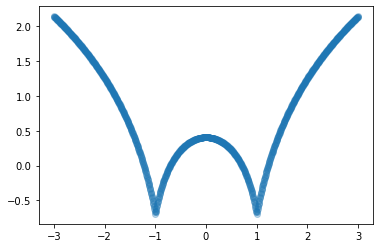

In [13]:
X_l = np.linspace(-3, 3, 1000) #linspace - Return evenly spaced numbers over a specified interval.
y_l = np.log(np.abs((X_l ** 2) - 1) + 0.5)
#X_l += np.random.normal(scale=0.05, size=1000)
plt.scatter(X_l, y_l, alpha=0.3)

### Main + Handling Data

Width =  0.8


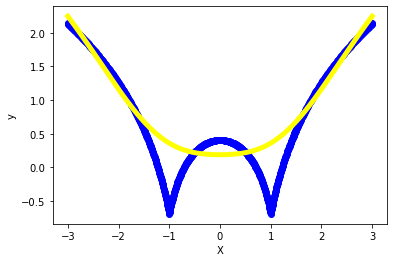

Width =  10


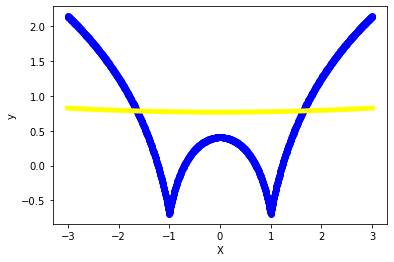

Width =  0.1


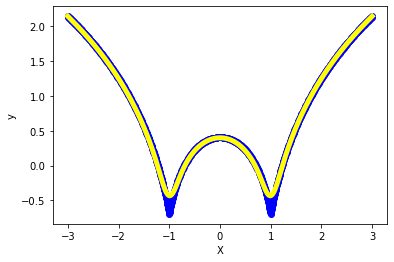

Width =  0.01


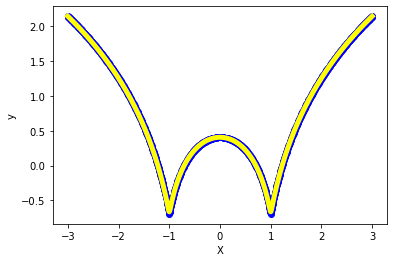

In [14]:
mcolA = np.mat(X_l)
mcolB = np.mat(y_l)
m = np.shape(mcolB)[1] # Demmy column (X0)
one = np.ones((1, m), dtype = int)
# horizontal stacking
X_f = np.hstack((one.T, mcolA.T))

# Generate samples of width
for width in [0.8, 10, 0.1, 0.01]:
    print("Width = ", width)
    plot_local_regression(X_l, y_l, X_f, mcolB, width).show()